In [1]:
## From http://cs231n.github.io/neural-networks-case-study/#grad
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
N = 100; D = 2; K =3 ;

In [3]:
X= np.zeros((N*K,D)) # (x,y for our data)
y = np.zeros(N*K, dtype='uint8') # labels
np.linspace(0.0,1,N)

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

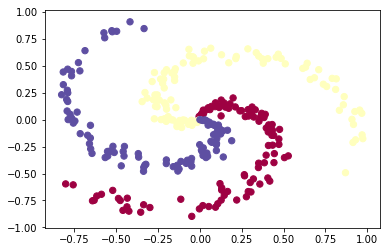

In [4]:
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    radius = np.linspace(0.0,1,N)
    theta = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    X[ix] = np.c_[radius*np.sin(theta), radius*np.cos(theta)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Weights and bias

In [5]:
def init_weights():
    W = 0.01 * np.random.randn(D,K)
    W.shape
    b = np.zeros((1,K))
    return (W,b)
    (b.shape, W.shape)


In [6]:
X[1,:]

array([ 0.00323326,  0.00956956])

In [7]:
#scores = np.dot(X,W) + b

In [8]:
#f = scores[1] # array of classe scores, unnormalized log probabilities

In [9]:
def class_probs():
    scores = np.dot(X,W) + b
    probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True) # probabilities
    return (scores, probs)
    # np.exp(scores).shape, np.sum(np.exp(scores),axis=1).shape

In [10]:
len(X)

300

# Loss calculation

In [16]:
# Loss
training_size = len(X)
# probs[range(training_size),y]
# probs[1,y[1]]
# probs[range(4),[0,0,0,1]]


def calc_loss():
    # selects the probability for the correct class
    correct_probs = probs[range(training_size),y] # selects the prob from correct label
    #loss is the average log probs for every training
    data_loss = -np.sum(np.log(correct_probs)) / training_size
    #regularization loss is the sum of the elementwise multiplication of the 2 matrices by reg factor
    reg_loss = 0.5*reg*np.sum(W*W)
#     print ("reg loss %.3f and data loss %.3f" % (reg_loss, data_loss))
    # H = np.array([[1,2,3], [4,5,6]]) ; print(H.shape, type(H), H*H)
    loss = data_loss+reg_loss
    return loss

In [17]:
# Gradients
# Pyi notations denotes prob for lith row. fk is the score for class k
# dL / dfk (loss wrt to class k)
# softmax max the gradient linear with respect to loss
def calc_gradients():
    class_prob = np.zeros((training_size,K))
    class_prob[range(training_size),y] = 1
    dl_dprobs = probs - class_prob
    dscores = dl_dprobs / training_size # loss is the average over all examples
    dW = np.dot(X.T, dscores) # delta on the items
    db = np.sum(dscores, axis=0, keepdims=True) # adds on dimension 0 for all samples
    dreg = reg*W # reason for having 0.5
    dW += dreg
    return (dW,db)
#     print(db,dreg)




In [18]:
def param_update():
    W = W - step_size*dW
    b = b -  step_size*db
    

# Fit

In [19]:
step_size = 0.9; reg = 0.001; sim_steps = 200

In [20]:
(W,b)=init_weights()
for i in xrange(sim_steps):
    (scores, probs) = class_probs()
    loss = calc_loss()
    (dW, db) = calc_gradients()
    print("iteration %d, loss %f" % (i,loss))
    W += -step_size * dW
    b += -step_size * db
    

iteration 0, loss 1.099131
iteration 1, loss 1.071965
iteration 2, loss 1.047496
iteration 3, loss 1.025424
iteration 4, loss 1.005483
iteration 5, loss 0.987439
iteration 6, loss 0.971082
iteration 7, loss 0.956229
iteration 8, loss 0.942715
iteration 9, loss 0.930398
iteration 10, loss 0.919150
iteration 11, loss 0.908858
iteration 12, loss 0.899425
iteration 13, loss 0.890763
iteration 14, loss 0.882795
iteration 15, loss 0.875452
iteration 16, loss 0.868675
iteration 17, loss 0.862409
iteration 18, loss 0.856607
iteration 19, loss 0.851227
iteration 20, loss 0.846230
iteration 21, loss 0.841584
iteration 22, loss 0.837256
iteration 23, loss 0.833221
iteration 24, loss 0.829454
iteration 25, loss 0.825932
iteration 26, loss 0.822637
iteration 27, loss 0.819549
iteration 28, loss 0.816653
iteration 29, loss 0.813935
iteration 30, loss 0.811380
iteration 31, loss 0.808976
iteration 32, loss 0.806713
iteration 33, loss 0.804581
iteration 34, loss 0.802569
iteration 35, loss 0.800671
it

# Evaluate

In [21]:
scores = np.dot(X,W) + b
evaluated_class = np.argmax(scores, axis = 1)
np.mean(evaluated_class == y)

0.5033333333333333

# with 1 hidden layer

In [22]:
def init_weights(h):
    # h hidden layer size
    W = 0.01 * np.random.randn(D,h)
    W2 = 0.01 * np.random.randn(h,K)
    b = np.zeros((1,h))
    b2 = np.zeros((1,K))
    return (W,b, W2,b2)


In [23]:
(W,b, W2,b2) = init_weights(100)


In [24]:

def forward_pass():
    h_act = np.dot(X,W) + b
    h_act[np.where(h_act <=0)] = 0 # np.maximum
    scores = np.dot(h_act,W2) + b2
    probs = np.exp(scores) / np.sum(np.exp(scores), axis = 1, keepdims = True)
    return (scores, probs, h_act)

In [26]:
def backward_pass():
    dscores = probs 
    dscores[range(training_size),y] -= 1 
    dscores = dscores / training_size # loss is the average over all examples
    dW2 = np.dot(h_act.T, dscores) # delta on the items
    db2 = np.sum(dscores, axis=0, keepdims=True) # adds on dimension 0 for all samples
    dreg2 = reg*W2 # reason for having 0.5
    dW2 += dreg2
    dhidden = np.dot(dscores, W2.T) # dhidden / dscores
    dhidden[h_act <=0] = 0
    dW2 = np.dot(W.T, dhidden)
    db2 = np.sum(dhidden, axis=0, keepdims=True) # adds on dimension 0 for all samples
    return (dW,db,dW2, db2)

In [ ]:
def calc_loss():
    

In [27]:
step_size = 0.9; reg = 0.001; sim_steps = 200

In [ ]:
(W,b, W2,b2) = init_weights(100)

for i in xrange(sim_steps):
    (scores, probs, h_act) = forward_pass()
    loss = calc_loss()
    (dW, db) = calc_gradients()
    print("iteration %d, loss %f" % (i,loss))
    W += -step_size * dW
    b += -step_size * db